In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
hmda_dataset_original = pd.read_csv('state_NY.csv')
hmda_dataset = hmda_dataset_original.copy()
hmda_dataset.head()

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2020,JJKC32MCHWDI71265Z06,40380,NY,36055.0,3.605501e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5560,16.31,76200,139,1997,2093,45
1,2020,JJKC32MCHWDI71265Z06,35614,NY,36119.0,3.611901e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,4305,21.84,81800,258,1323,1314,76
2,2020,JJKC32MCHWDI71265Z06,45060,NY,36067.0,3.606701e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5825,9.10,75800,152,1781,2019,23
3,2020,JJKC32MCHWDI71265Z06,35614,NY,36119.0,3.611901e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,4136,72.32,81800,136,766,1278,64
4,2020,JJKC32MCHWDI71265Z06,35614,NY,36081.0,3.608111e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,2496,56.97,81800,106,612,948,65


In [3]:
hmda_dataset.columns

Index(['activity_year', 'lei', 'derived_msa-md', 'state_code', 'county_code',
       'census_tract', 'conforming_loan_limit', 'derived_loan_product_type',
       'derived_dwelling_category', 'derived_ethnicity', 'derived_race',
       'derived_sex', 'action_taken', 'purchaser_type', 'preapproval',
       'loan_type', 'loan_purpose', 'lien_status', 'reverse_mortgage',
       'open-end_line_of_credit', 'business_or_commercial_purpose',
       'loan_amount', 'loan_to_value_ratio', 'interest_rate', 'rate_spread',
       'hoepa_status', 'total_loan_costs', 'total_points_and_fees',
       'origination_charges', 'discount_points', 'lender_credits', 'loan_term',
       'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization',
       'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'property_value', 'construction_method',
       'occupancy_type', 'manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest', 'total_

## Data Cleaning / Processing

In [4]:
def change_action_taken_name(y):
    if ( y == 1):
        return "Loan originated"
    if (y == 2):
        return "Application approved but not accepted"
    if (y == 3):
        return "Application denied"
    if (y == 4):
        return "Application withdrawn by applicant"
    if (y == 5):
        return "File closed for incompleteness"
    if (y == 6):
        return "Purchased loan"
    if (y == 7):
        return "Preapproval request denied"
    if (y == 8):
        return "Preapproval request approved but not accepted"
    else:
        return "N/A"

In [5]:
def change_loan_type_name(y):
    if ( y == 1):
        return "Conventional (not insured or guaranteed by FHA, VA, RHS, FSA)"
    if (y == 2):
        return "Federal Housing Administration insured (FHA)"
    if (y == 3):
        return "Veterans Affairs guaranteed (VA)"
    if (y == 4):
        return "USDA Rural Housing Service or Farm Service Agency guaranteed (RHS or FSA)"
    else:
        return "N/A"

In [6]:
def change_loan_purpose_name(y):
    if ( y == 1):
        return "Home purchase"
    if (y == 2):
        return "Home improvement"
    if (y == 31):
        return "Refinancing"
    if (y == 32):
        return "Cash-out refinancing"
    if (y == 4):
        return "Other purpose"
    if (y == 5):
        return "Not applicable"
    else:
        return "N/A"

In [7]:
def change_lien_status_name(y):
    if ( y == 1):
        return "Secured by a first lien"
    if (y == 2):
        return "Secured by a subordinate lien"
    else:
        "N/A"

In [8]:
def change_construction_method_name(y):
    if ( y == 1):
        return "Site-built"
    if (y == 2):
        return "Manufactured home"
    else:
        "N/A"

In [9]:
def change_derived_ethnicity_name(y):
    if ( y == 1):
        return "Hispanic or Latino"
    if (y == 2):
        return "Not Hispanic or Latino"
    if (y == 3):
        return "Joint"
    if (y == 4):
        return "Ethnicity Not Available"
    if (y == 5):
        return "Free Form Text Only"
    else:
        return "N/A"

In [10]:
def change_derived_race_name(y):
    if ( y == 1):
        return "American Indian or Alaska Native"
    if (y == 2):
        return "Asian"
    if (y == 3):
        return "Black or African American"
    if (y == 4):
        return "Native Hawaiian or Other Pacific Islander"
    if (y == 5):
        return "White"
    if ( y == 6):
        return "2 or more minority races"
    if (y == 7):
        return "Joint"
    if (y == 8):
        return "Free Form Text Only"
    if (y == 9):
        return "Race Not Available"
    else:
        return "N/A"

In [11]:
def change_derived_sex_name(y):
    if ( y == 1):
        return "Male"
    if (y == 2):
        return "Female"
    if (y == 3):
        return "Joint"
    if (y == 4):
        return "Sex Not Available"
    else:
        return "N/A"

In [12]:
def change_applicant_age_name(y):
    if ( y == "<25"):
        return 1
    if (y == "25-34"):
        return 2
    if (y == "35-44"):
        return 3
    if (y == "45-54"):
        return 4
    if (y == "55-64"):
        return 5
    if ( y == "65-74"):
        return 6
    if (y == ">74"):
        return 7
    else:
        return 8

In [13]:
hmda_dataset['action_taken_name'] = hmda_dataset['action_taken']
hmda_dataset['action_taken_name'] = hmda_dataset['action_taken_name'].apply(change_action_taken_name)

hmda_dataset['loan_type_name'] = hmda_dataset['loan_type']
hmda_dataset['loan_type_name'] = hmda_dataset['loan_type_name'].apply(change_loan_type_name)

hmda_dataset['loan_purpose_name'] = hmda_dataset['loan_purpose']
hmda_dataset['loan_purpose_name'] = hmda_dataset['loan_purpose_name'].apply(change_loan_purpose_name)

hmda_dataset['lien_status_name'] = hmda_dataset['lien_status']
hmda_dataset['lien_status_name'] = hmda_dataset['lien_status_name'].apply(change_lien_status_name)

hmda_dataset['construction_method_name'] = hmda_dataset['construction_method']
hmda_dataset['construction_method_name'] = hmda_dataset['construction_method_name'].apply(change_construction_method_name)

#Ethnicity
hmda_dataset['applicant_ethnicity-1_name'] = hmda_dataset['applicant_ethnicity-1']
hmda_dataset['applicant_ethnicity-1_name'] = hmda_dataset['applicant_ethnicity-1_name'].apply(change_derived_ethnicity_name)

hmda_dataset['co-applicant_ethnicity-1_name'] = hmda_dataset['co-applicant_ethnicity-1']
hmda_dataset['co-applicant_ethnicity-1_name'] = hmda_dataset['co-applicant_ethnicity-1_name'].apply(change_derived_ethnicity_name)

hmda_dataset['applicant_ethnicity_observed_name'] = hmda_dataset['applicant_ethnicity_observed']
hmda_dataset['applicant_ethnicity_observed_name'] = hmda_dataset['applicant_ethnicity_observed_name'].apply(change_derived_ethnicity_name)

hmda_dataset['co-applicant_ethnicity_observed_name'] = hmda_dataset['co-applicant_ethnicity_observed']
hmda_dataset['co-applicant_ethnicity_observed_name'] = hmda_dataset['co-applicant_ethnicity_observed_name'].apply(change_derived_ethnicity_name)

#Race
hmda_dataset['applicant_race-1_name'] = hmda_dataset['applicant_race-1']
hmda_dataset['applicant_race-1_name'] = hmda_dataset['applicant_race-1_name'].apply(change_derived_race_name)

hmda_dataset['co-applicant_race-1_name'] = hmda_dataset['co-applicant_race-1']
hmda_dataset['co-applicant_race-1_name'] = hmda_dataset['co-applicant_race-1_name'].apply(change_derived_race_name)

hmda_dataset['applicant_race_observed_name'] = hmda_dataset['applicant_race_observed']
hmda_dataset['applicant_race_observed_name'] = hmda_dataset['applicant_race_observed_name'].apply(change_derived_race_name)

hmda_dataset['co-applicant_race_observed_name'] = hmda_dataset['co-applicant_race_observed']
hmda_dataset['co-applicant_race_observed_name'] =hmda_dataset['co-applicant_race_observed_name'].apply(change_derived_race_name)

#Sex
hmda_dataset['applicant_sex_name'] = hmda_dataset['applicant_sex']
hmda_dataset['applicant_sex_name'] = hmda_dataset['applicant_sex_name'].apply(change_derived_sex_name)

hmda_dataset['co-applicant_sex_name'] = hmda_dataset['co-applicant_sex']
hmda_dataset['co-applicant_sex_name'] = hmda_dataset['co-applicant_sex_name'].apply(change_derived_sex_name)

hmda_dataset['applicant_sex_observed_name'] = hmda_dataset['applicant_sex_observed']
hmda_dataset['applicant_sex_observed_name'] = hmda_dataset['applicant_sex_observed_name'].apply(change_derived_sex_name)

hmda_dataset['co-applicant_sex_observed_name'] = hmda_dataset['co-applicant_sex_observed']
hmda_dataset['co-applicant_sex_observed_name'] = hmda_dataset['co-applicant_sex_observed_name'].apply(change_derived_sex_name)

#Age
hmda_dataset['applicant_age_num'] = hmda_dataset['applicant_age']
hmda_dataset['applicant_age_num'] = hmda_dataset['applicant_age_num'].apply(change_applicant_age_name)


In [14]:
hmda_dataset.head()

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,co-applicant_ethnicity_observed_name,applicant_race-1_name,co-applicant_race-1_name,applicant_race_observed_name,co-applicant_race_observed_name,applicant_sex_name,co-applicant_sex_name,applicant_sex_observed_name,co-applicant_sex_observed_name,applicant_age_num
0,2020,JJKC32MCHWDI71265Z06,40380,NY,36055.0,3.605501e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,Joint,Joint,Joint,Black or African American,Black or African American,Sex Not Available,Sex Not Available,Joint,Joint,8
1,2020,JJKC32MCHWDI71265Z06,35614,NY,36119.0,3.611901e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,Joint,Joint,Joint,Black or African American,Black or African American,Sex Not Available,Sex Not Available,Joint,Joint,8
2,2020,JJKC32MCHWDI71265Z06,45060,NY,36067.0,3.606701e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,Joint,Joint,Joint,Black or African American,Black or African American,Sex Not Available,Sex Not Available,Joint,Joint,8
3,2020,JJKC32MCHWDI71265Z06,35614,NY,36119.0,3.611901e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,Joint,Joint,Joint,Black or African American,Black or African American,Sex Not Available,Sex Not Available,Joint,Joint,8
4,2020,JJKC32MCHWDI71265Z06,35614,NY,36081.0,3.608111e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,Joint,Joint,Joint,Black or African American,Black or African American,Sex Not Available,Sex Not Available,Joint,Joint,8


## Data Visualization

In [15]:
selected_visualized_dataset = ["action_taken_name", "loan_type_name", "loan_purpose_name", "lien_status_name",
                               "construction_method_name", "derived_loan_product_type", "derived_dwelling_category",
                               "applicant_ethnicity-1_name", "applicant_race-1_name", "applicant_sex_name",
                               "applicant_age"
                              ]
selected_visualized_dataset_title = ["Mortgage Action", "Loan Type", "Loan Purpose", "lien Status", 
                                     "Construction Method", "Loan Product Type", "Dwelling category",
                                     "Aplicant Ethnicity", "Applicant Race", "Applicant Sex", "Applicant Age"
                                    ]

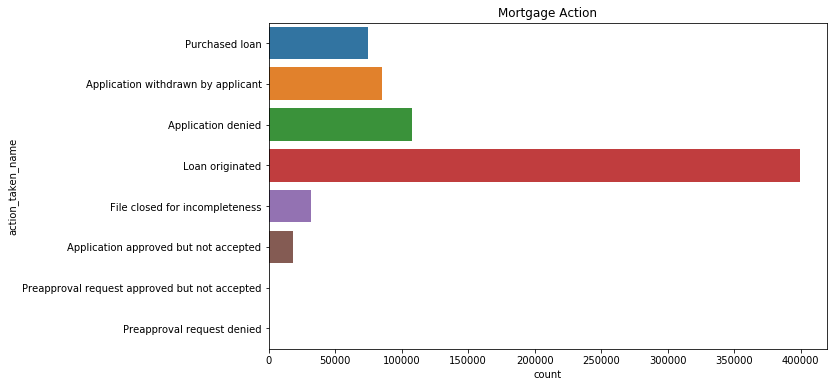

<Figure size 720x432 with 0 Axes>

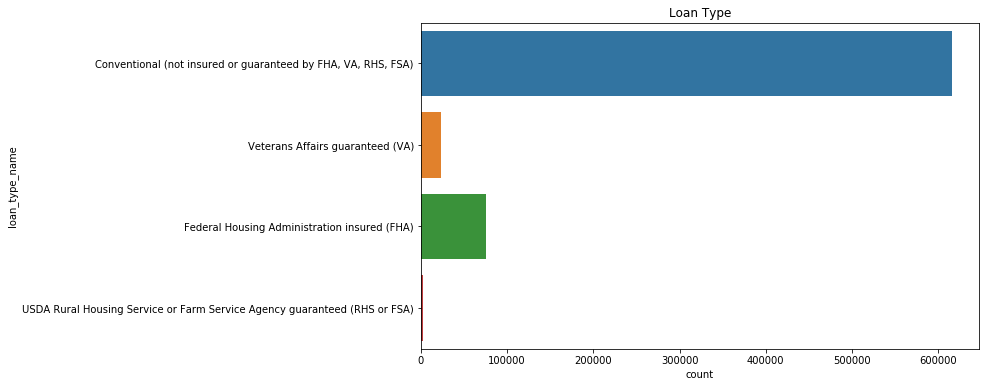

<Figure size 720x432 with 0 Axes>

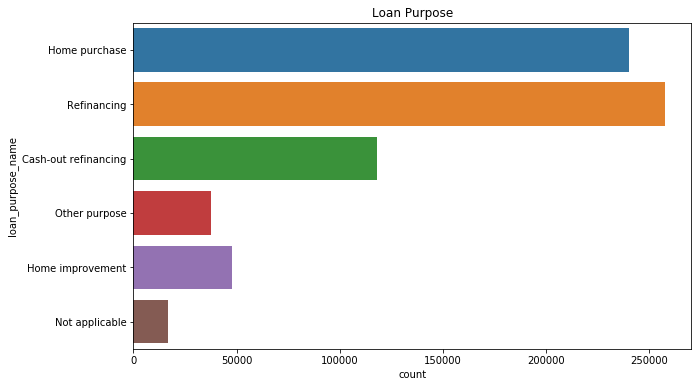

<Figure size 720x432 with 0 Axes>

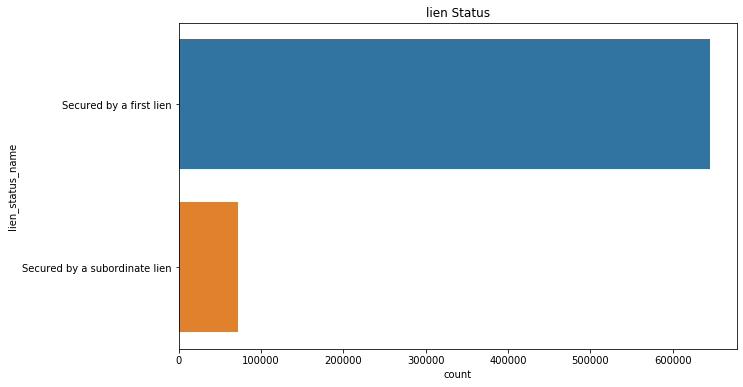

<Figure size 720x432 with 0 Axes>

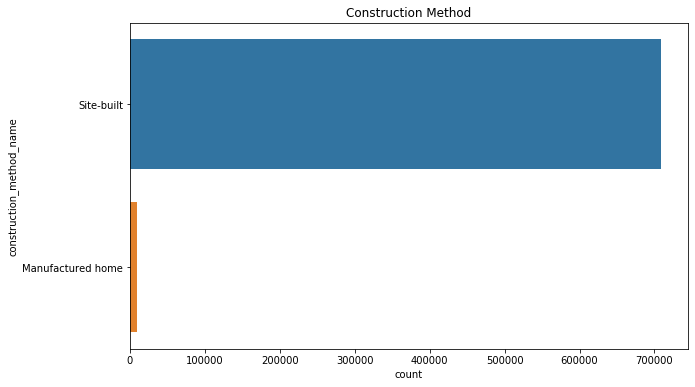

<Figure size 720x432 with 0 Axes>

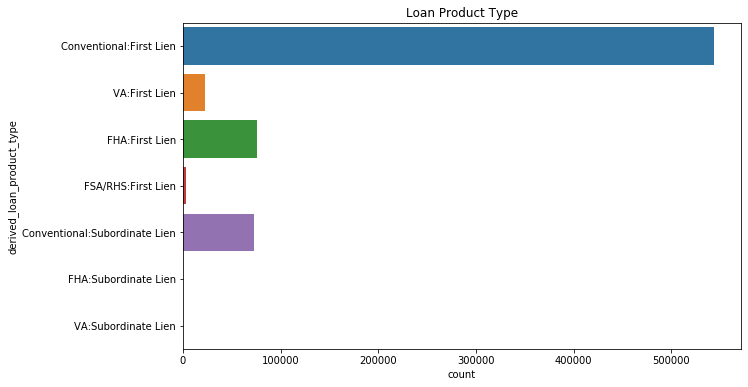

<Figure size 720x432 with 0 Axes>

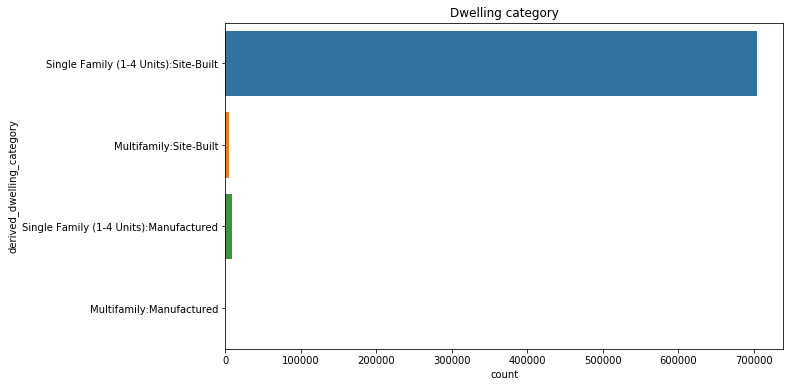

<Figure size 720x432 with 0 Axes>

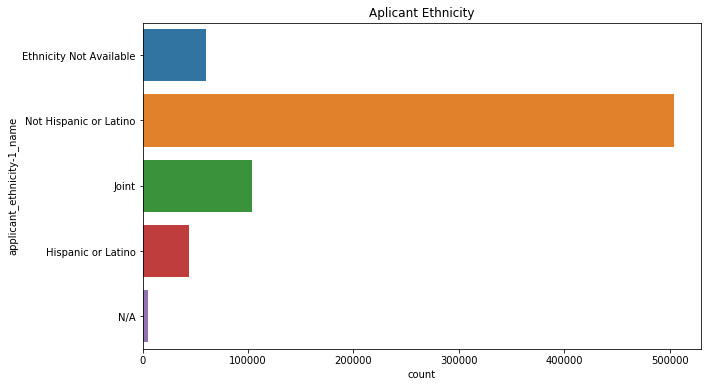

<Figure size 720x432 with 0 Axes>

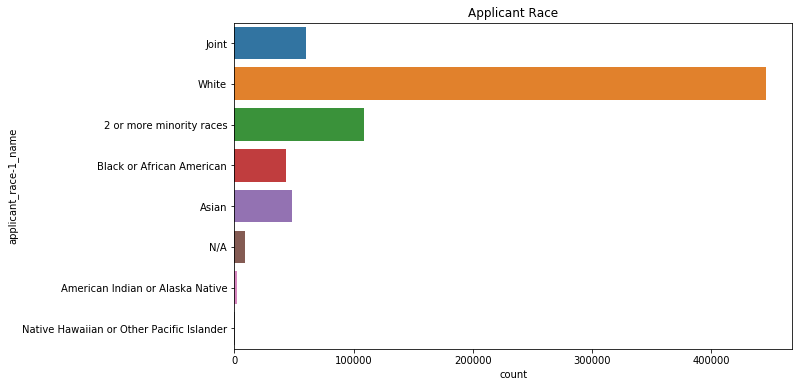

<Figure size 720x432 with 0 Axes>

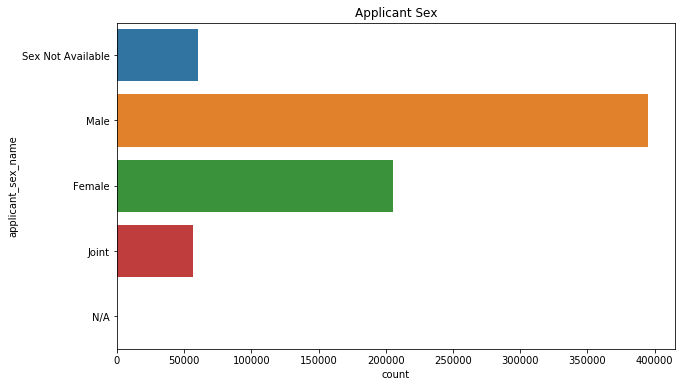

<Figure size 720x432 with 0 Axes>

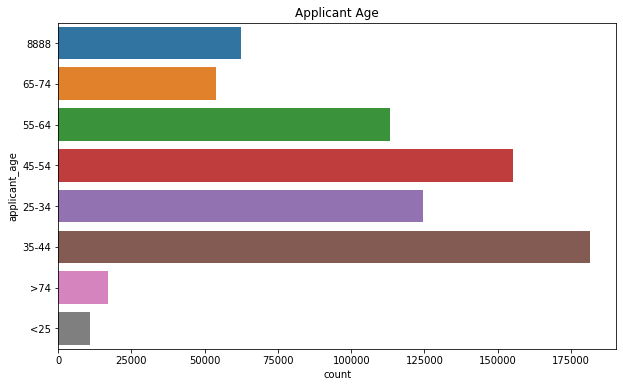

<Figure size 720x432 with 0 Axes>

In [16]:
for i in range(0, len(selected_visualized_dataset)):
    fig = plt.figure(figsize=(10,6))
    sns.countplot(y=selected_visualized_dataset[i], 
                  data=hmda_dataset)
    plt.title(str(selected_visualized_dataset_title [i]))
    plt.figure(figsize=(10,6))

In [17]:
cols = [i for i in hmda_dataset.columns if hmda_dataset[i].dtype != 'object']

In [18]:
list_to_remove = ['action_taken']
features = cols
features= list(set(cols).difference(set(list_to_remove)))

X = hmda_dataset[features]
y = hmda_dataset['action_taken']

In [19]:
def change_action_taken(y):
    if ( y == 1):
        return 1
    else:
        return 0

In [20]:
y = hmda_dataset['action_taken'].apply(change_action_taken)
X = X.fillna(0)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
import xgboost as xgb

model_xgboost= xgb.XGBClassifier()
model_xgboost.fit(X_train,y_train)

[22:23:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
pred_xgboost=model_xgboost.predict(X_test)
xgboost_score =accuracy_score(pred_xgboost, y_test)
xgboost_pred_score =round(xgboost_score*100,2)
xgboost_pred_score

99.4

In [24]:
print(classification_report(y_test,pred_xgboost))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     79622
           1       0.99      1.00      0.99     99915

    accuracy                           0.99    179537
   macro avg       0.99      0.99      0.99    179537
weighted avg       0.99      0.99      0.99    179537



In [25]:
import lightgbm as lgb

model_lightgbm = lgb.LGBMClassifier()
model_lightgbm.fit(X_train,y_train)

LGBMClassifier()

In [26]:
pred_lightgbm=model_lightgbm.predict(X_test)
lightgbm_score =accuracy_score(pred_lightgbm, y_test)
lightgbm_pred_score =round(lightgbm_score*100,2)
lightgbm_pred_score

99.37

In [27]:
print(classification_report(y_test,pred_lightgbm))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     79622
           1       0.99      0.99      0.99     99915

    accuracy                           0.99    179537
   macro avg       0.99      0.99      0.99    179537
weighted avg       0.99      0.99      0.99    179537



## xgboost gives best scores from "xgboost" and "LGBMClassifier"

In [28]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [29]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [30]:
print_evaluate(y_train,model_xgboost.predict(X_train))

MAE: 0.004778968084513841
MSE: 0.004778968084513841
RMSE: 0.06913008089474394
R2 Square 0.9806374798053673


In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

Text(0.5, 1.0, 'ROC Curve')

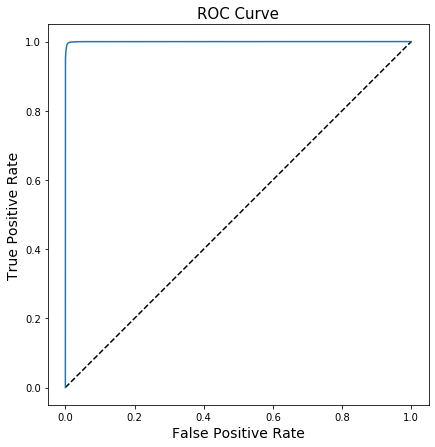

In [32]:
model_predict_test=model_xgboost.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_predict_test)
plt.figure(figsize=(15,7))
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC Curve',fontsize=15)

# Where are mortgages most likely to be approved?

## By Ethnicity

In [33]:
hmda_dataset['applicant_ethnicity-1_name'].value_counts()

Not Hispanic or Latino     504251
Joint                      103967
Ethnicity Not Available     60401
Hispanic or Latino          44207
N/A                          5321
Name: applicant_ethnicity-1_name, dtype: int64

In [34]:
loans_not_latino = X[X['applicant_ethnicity-1'] == 2]
loans_latino = X[X['applicant_ethnicity-1'] == 1]

In [35]:
predictions_not_latino = model_xgboost.predict(loans_not_latino)

predictions_latino = model_xgboost.predict(loans_latino)

In [36]:
approval_rate_not_latino = np.sum(predictions_not_latino) / predictions_not_latino.shape
print("Approval rate for Non Latino's:", approval_rate_not_latino * 100)

approval_rate_latino = np.sum(predictions_latino) / predictions_latino.shape
print("Approval rate for Latino's:", approval_rate_latino * 100)

Approval rate for Non Latino's: [61.00414278]
Approval rate for Latino's: [52.87171715]


## By Race

In [37]:
loans_white = X[X['applicant_race-1'] == 5]
loans_black = X[X['applicant_race-1'] == 3]
loans_asian = X[X['applicant_race-1'] == 2]
loans_indian = X[X['applicant_race-1'] == 1]
loans_hawaiian = X[X['applicant_race-1'] == 4]

In [38]:
predictions_white = model_xgboost.predict(loans_white)

predictions_black = model_xgboost.predict(loans_black)

predictions_asian = model_xgboost.predict(loans_asian)

predictions_indian = model_xgboost.predict(loans_indian)

predictions_hawaiian = model_xgboost.predict(loans_hawaiian)

In [39]:
approval_rate_white = np.sum(predictions_white) / predictions_white.shape
print("Approval rate for Whites:", approval_rate_white * 100)

approval_rate_black = np.sum(predictions_black) / predictions_black.shape
print("Approval rate for Black:", approval_rate_black* 100)

approval_rate_asian = np.sum(predictions_asian) / predictions_asian.shape
print("Approval rate for Asian:", approval_rate_asian* 100)

approval_rate_indian = np.sum(predictions_indian) / predictions_indian.shape
print("Approval rate for Indian:", approval_rate_indian* 100)

approval_rate_hawaiian = np.sum(predictions_hawaiian) / predictions_hawaiian.shape
print("Approval rate for Hawaiian:", approval_rate_hawaiian* 100)

Approval rate for Whites: [62.2459377]
Approval rate for Black: [49.47065379]
Approval rate for Asian: [56.45087522]
Approval rate for Indian: [43.24022346]
Approval rate for Hawaiian: [43.71460929]


## By Sex

In [40]:
loans_male = X[X['applicant_sex'] == 1]
loans_female = X[X['applicant_sex'] == 2]
loans_joint = X[X['applicant_sex'] == 3]

In [41]:
predictions_male = model_xgboost.predict(loans_male)

predictions_female = model_xgboost.predict(loans_female)

predictions_joint = model_xgboost.predict(loans_joint)

In [42]:
approval_rate_male = np.sum(predictions_male) / predictions_male.shape
print("Approval rate for Male:", approval_rate_male* 100)

approval_rate_female = np.sum(predictions_female) / predictions_female.shape
print("Approval rate for Female:", approval_rate_female* 100)

approval_rate_joint = np.sum(predictions_joint) / predictions_joint.shape
print("Approval rate for Joint:", approval_rate_joint* 100)

Approval rate for Male: [59.80059639]
Approval rate for Female: [59.43432929]
Approval rate for Joint: [57.48101199]


## By Age

In [43]:
loans_less_25 =  X[X['applicant_age_num'] == 1]
loans_25_34 = X[X['applicant_age_num'] == 2]
loans_35_44 = X[X['applicant_age_num'] == 3]
loans_45_54 = X[X['applicant_age_num'] == 4]
loans_55_64 = X[X['applicant_age_num'] == 5]
loans_65_74 = X[X['applicant_age_num'] == 6]
loans_greater_75 =  X[X['applicant_age_num'] == 7]

In [44]:
predictions_less_25 = model_xgboost.predict(loans_less_25)

predictions_25_34 = model_xgboost.predict(loans_25_34)

predictions_35_44 = model_xgboost.predict(loans_35_44)

predictions_45_54 = model_xgboost.predict(loans_45_54)

predictions_55_64 = model_xgboost.predict(loans_55_64)

predictions_65_74 = model_xgboost.predict(loans_65_74)

predictions_greater_75 = model_xgboost.predict(loans_greater_75)

In [45]:
approval_rate_less_25 = np.sum(predictions_less_25) / predictions_less_25.shape
print("Approval rate age > 25", approval_rate_less_25* 100)

approval_rate_25_34 = np.sum(predictions_25_34) / predictions_25_34.shape
print("Approval rate age 25-24:", approval_rate_25_34* 100)

approval_rate_35_44 = np.sum(predictions_35_44) / predictions_35_44.shape
print("Approval rate age 35-44:", approval_rate_35_44* 100)

approval_rate_45_54 = np.sum(predictions_45_54) / predictions_45_54.shape
print("Approval rate age 45-54:", approval_rate_45_54* 100)

approval_rate_55_64 = np.sum(predictions_55_64) / predictions_55_64.shape
print("Approval rate age 55-64:", approval_rate_55_64* 100)

approval_rate_65_74 = np.sum(predictions_65_74) / predictions_65_74.shape
print("Approval rate age 65-74:", approval_rate_65_74* 100)

approval_rate_greater_75 = np.sum(predictions_greater_75) / predictions_greater_75.shape
print("Approval rate age > 75:", approval_rate_greater_75* 100)

Approval rate age > 25 [63.23247098]
Approval rate age 25-24: [65.37602263]
Approval rate age 35-44: [62.20002537]
Approval rate age 45-54: [58.21189876]
Approval rate age 55-64: [55.43952109]
Approval rate age 65-74: [53.86515602]
Approval rate age > 75: [48.26282203]


# Can you predict mortgage decisions based on the criteria provided here?

## Loan Purpose

In [46]:
#partial dependencies
from pdpbox import pdp, get_dataset, info_plots

In [47]:
feat_name = 'loan_purpose'
pdp_dist = pdp.pdp_isolate(model=model_xgboost, dataset=X_test, model_features=features, feature=feat_name)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


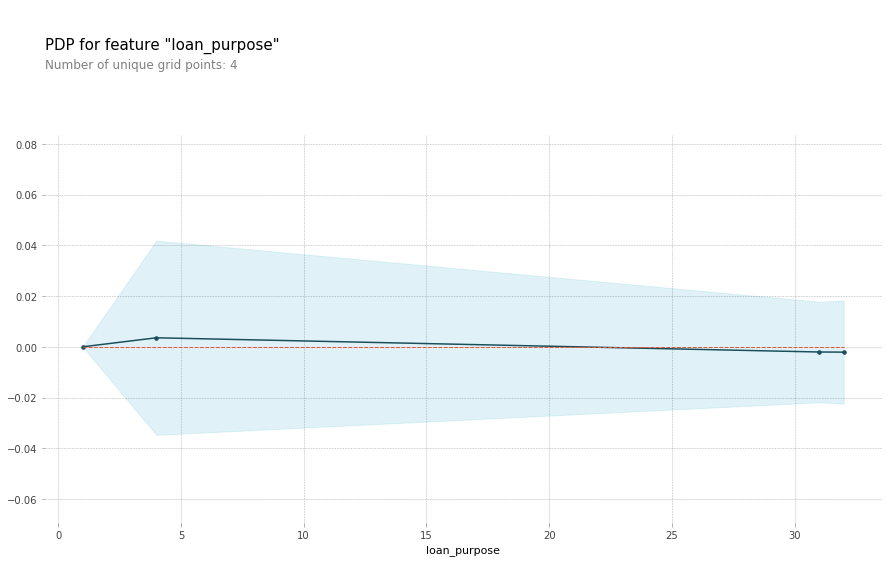

In [48]:
fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_dist,
                         feature_name=feat_name)

In [49]:
hmda_dataset.groupby(['loan_purpose','loan_purpose_name']).loan_type.count()

loan_purpose  loan_purpose_name   
1             Home purchase           240357
2             Home improvement         47699
4             Other purpose            37684
5             Not applicable           16768
31            Refinancing             257708
32            Cash-out refinancing    117931
Name: loan_type, dtype: int64

## Income

In [50]:
feat_name = 'income'
pdp_dist = pdp.pdp_isolate(model=model_xgboost, dataset=X_test, model_features=features, feature=feat_name)

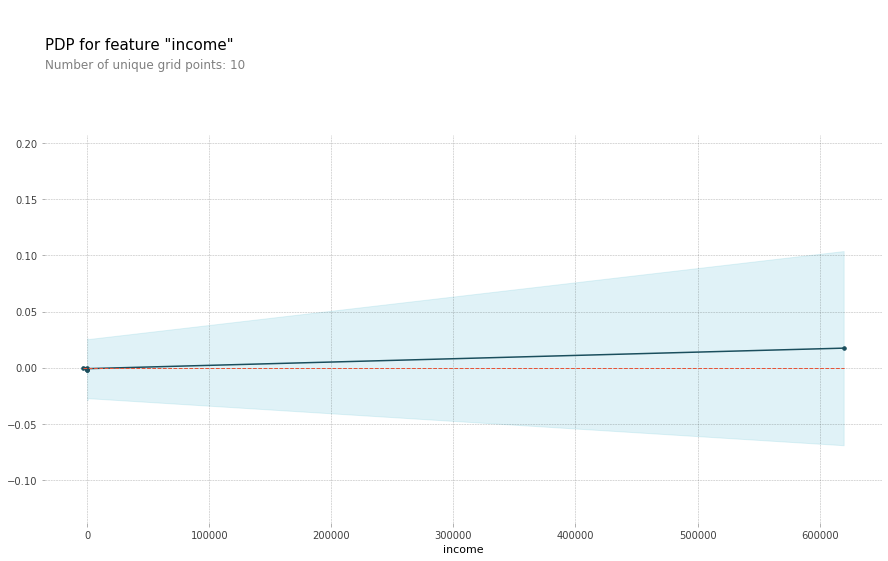

In [51]:
fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_dist,
                         feature_name=feat_name)

In [52]:
hmda_dataset[feat_name].describe()

count    6.390170e+05
mean     3.802801e+02
std      9.254584e+03
min     -3.131200e+04
25%      7.300000e+01
50%      1.120000e+02
75%      1.750000e+02
max      4.338770e+06
Name: income, dtype: float64

In [53]:
hmda_dataset.groupby(['loan_purpose','loan_purpose_name']).income.count()

loan_purpose  loan_purpose_name   
1             Home purchase           215865
2             Home improvement         45409
4             Other purpose            35971
5             Not applicable              72
31            Refinancing             231620
32            Cash-out refinancing    110080
Name: income, dtype: int64

### Based on those graph above, we know loan purpose and loan income of Home purchase has the highest probablity of Loan Orgination.